# ML Model for Detecting if Patient is Sick or Healthy

## Breif Description about Problem Statment and its Solution
For creating an ML model to detect is patient is sick or not we have given `4 dataset` files ( `BloodPressure.csv`, `Glucose.csv`, `Oximetry.csv`, `Weight_Height.csv` ). Below are the given steps which have been taken to solve the problem and build a ML model:

- **Step1:** `Merging Data Files`
    - For a single patient we have multiple set of data in all these 4 files. So for a complete set of data for a  single patient, we have to merge these files according to `Patient id` which is `Patient column` and `Date Column` is also important in mergining the data files. **We will merge each patient's data which have been recorded on same date**. This step has been done in `Merging Files` script.  
    

- **Step2:** `Data Cleaning`
    - Now after step 1, we have a complete dataset, but now we have some missing entries and outliers in the dataset. So for this purpose we will clean the dataset. We will first compute and remove the missing values and then we will check the outliers. For checking outliers we will use `Z function` and for outliers visualization we will be using `box plot` provided by `seaborn library`.


- **Step3:** `Feature Analysis`
    - In this step we will use correlation analysis to analyze all the features which are given in the dataset. We have **removed 2 features** after correlation analysis which are `Patient` and `Date`, they both have same values on different rows which effected their correlation analysis result very badly. So after deleting them we will be using 9 features for Training and Testing the Model.
    
    
- **Step4:** `K-means Clustring`
    - As you know we don't have label/target/class of data. So in this case it is best to use unsupervised learning models so we can detect the clusters in the dataset. Each cluster will have different class/label. In our case we have 2 different classes to detect `Sick` and `Healthy`, so we have 2 clusters of data.
    
    
- **Step5:** `Neural Network`
    - After applying K-means clustring we got 2 clusters of data and then we merged the class/label of each cluster with the dataset. Now we have a dataset with class/label, so we will train `Neural Networks` model to detect which patient is healthy/sick. Before applying `Neural Networks` we will scale and convert the data and we will split the dataset into training and teseting subsets.
    - We will define a `Neural Network` architecture which we will use to detect healthy/sick patients.
    - We will use `cross validation` technique to prevent overfitting.
    - After all these steps we will train and test the model.
    
    
- **Step6:** `Saving information`
    - For our last presentation step we will need to save some of the information in files. We will store the `Neural Network model` to predict the classes, `Training and Testing scores`, `Each Feature Maximum value` which will be used to scale the data when we will predict the classes.
    

- **Step7:** `Model Presentation`
    - For model presentation we will be using `Dash by Plotly`. Dash is python library same as Shiny which is for R language. Model presentation files are provided in `Model Presentation Folder`. 

---
## Importing Libraries
In the cell given below we will import all the libraries which will be used in this notebook.

- **pandas:** For reading datasets, and used for manipulation of dataframes.
- **numpy:** For converting dataframe into vector arrays (used by Neural Networks).
- **seaborn:** Visualization Library.
- **maplotlib:** Visualization Library.
- **scipy:** Stats library for calculating outliers.
- **sklearn:** ML library, used for K-means clusting and spliting the training and testing set.
- **IPython:** Library for visualizing dataframes
- **keras:** Library for Neural Netowrks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from scipy import stats
from sklearn.cluster import KMeans
from IPython.display import display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.models import model_from_json
import os

%matplotlib inline

np.random.seed(42)

---
## Reading Dataset
In the first step we have merged all the files and stored the new dataframe in `merged_df.csv` file, now we will use this dataset for further calculations. We will read the dataset with the help of pandas library function `.read_csv()`, after that we have dropped a columns, this was an unwanted column generated when we were saving the data in new dataframe, so I have droped that column becuase we don't need that.

In [2]:
data = pd.read_csv('merged_df.csv')

data = data.drop(data.columns[0], axis=1)

data[:25]

,Date,Patient,Systolic,Diastolic,AvBloodPressure,HeartRate,Glucose,SpO2,Weight,Height,IMC
0,2/24/2014,1.0,93.0,69.0,75.0,95.0,78.0,97.0,47.60,1.57,19.31
1,8/29/2014,1.0,108.0,76.0,87.0,81.0,92.0,96.0,49.70,1.55,20.69
2,11/13/2014,1.0,96.0,73.0,81.0,100.0,150.0,95.0,48.10,1.57,19.51
3,4/30/2015,1.0,98.0,74.0,83.0,87.0,86.0,96.0,76.00,1.54,32.05
4,4/30/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.20,1.52,21.30
5,3/1/2013,2.0,118.0,61.0,137.0,59.0,115.0,92.0,111.34,1.82,33.61
6,3/5/2013,2.0,86.0,86.0,124.0,106.0,133.0,85.0,111.17,1.82,33.56
7,3/9/2013,2.0,139.0,54.0,107.0,99.0,61.0,60.0,111.11,1.82,33.54
8,3/13/2013,2.0,143.0,68.0,117.0,104.0,100.0,60.0,110.53,1.82,33.37
9,1/1/2015,2.0,112.0,50.0,116.0,107.0,85.0,66.0,46.07,1.58,18.45


---
## Data Cleaning 
For this step we will first calculate the `Missing values percentage` for each column. For calculating the missing percentage we will be using pandas library function `.isnull()`, this function returns the missing values in decimel point so for converting it into percentage we will use this expression `.sum()*100/len(data)`. And then we will display the missing percentage of each feature

In [3]:
missing_percentage = data.isnull().sum()*100/len(data)

print("Missing values in percentage: \n")
for miss, col in zip(missing_percentage, data.columns):
    print(col,": %.2f%%"%miss)
    

Missing values in percentage: 

Date : 0.00%
Patient : 16.67%
Systolic : 16.67%
Diastolic : 16.67%
AvBloodPressure : 16.67%
HeartRate : 16.67%
Glucose : 17.56%
SpO2 : 27.58%
Weight : 25.57%
Height : 25.57%
IMC : 25.57%


Now in the cell given below we will drop all the missing entries from the dataset. For this purpose we will be using pandas library function `.dropna()`, in this function the parameter `inplace=True` is used to save the dataframe in the same variable from which the function is been called.

In [4]:
data.dropna(inplace=True)

As mentioned above, we will drop the `Pateint` and `Date` columns because of low corrleation analysis result. So in the cell below we will drop the columns and then print the dataframe so we can see the updated dataframe

In [5]:
data = data.drop(['Patient','Date'], axis=1)

data

,Systolic,Diastolic,AvBloodPressure,HeartRate,Glucose,SpO2,Weight,Height,IMC
0,93.0,69.0,75.0,95.0,78.0,97.0,47.60,1.57,19.31
1,108.0,76.0,87.0,81.0,92.0,96.0,49.70,1.55,20.69
2,96.0,73.0,81.0,100.0,150.0,95.0,48.10,1.57,19.51
3,98.0,74.0,83.0,87.0,86.0,96.0,76.00,1.54,32.05
5,118.0,61.0,137.0,59.0,115.0,92.0,111.34,1.82,33.61
...,...,...,...,...,...,...,...,...,...
12139,120.0,60.0,142.0,60.0,150.0,66.0,56.12,1.82,16.94
12140,117.0,50.0,102.0,100.0,137.0,78.0,98.97,1.73,33.07
12141,139.0,74.0,136.0,75.0,83.0,70.0,98.67,1.73,32.97
12142,92.0,82.0,99.0,74.0,119.0,78.0,99.27,1.73,33.17


Now after dropping missing entries and the columns we will again calculate and print the missing values percentage for each feature

In [6]:
missing_percentage = data.isnull().sum()*100/len(data)

print("Missing values in percentage: \n")
for miss, col in zip(missing_percentage, data.columns):
    print(col,": %.2f%%"%miss)

Missing values in percentage: 

Systolic : 0.00%
Diastolic : 0.00%
AvBloodPressure : 0.00%
HeartRate : 0.00%
Glucose : 0.00%
SpO2 : 0.00%
Weight : 0.00%
Height : 0.00%
IMC : 0.00%


## Feature Visualization for Outliers
For detecting outliers in our dataset we will first visualize each feature and then we will use the `Z score` to detect outliers and then we will delete them from our dataset. 

For visualization of features we will be using `seaborn` library and its function `boxplot` will help in the visualization of each feature.

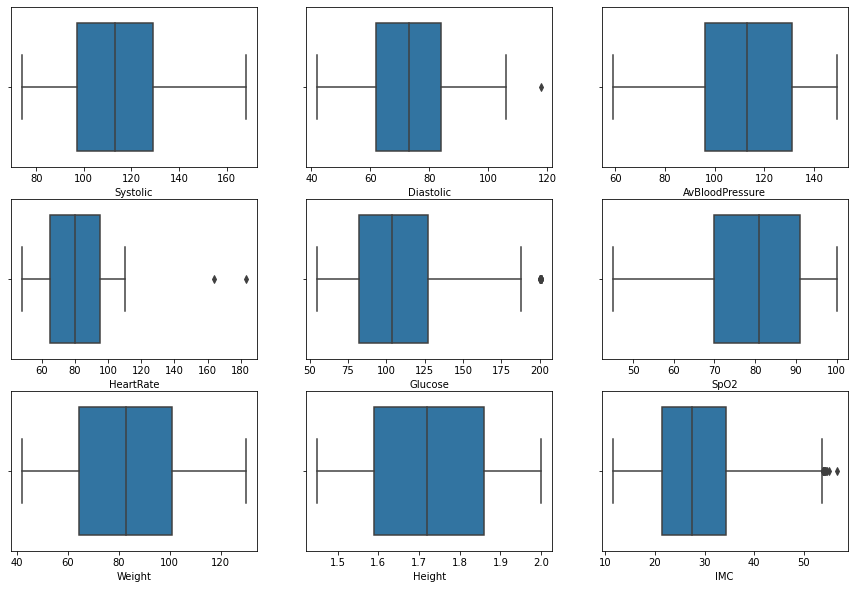

In [7]:
fig, axes = plt.subplots(3,3,figsize=(15,10))

sb.boxplot(x="Systolic", data=data, ax=axes[0, 0])
sb.boxplot(x="Diastolic", data=data, ax=axes[0, 1])
sb.boxplot(x="AvBloodPressure", data=data, ax=axes[0, 2])
sb.boxplot(x="HeartRate", data=data, ax=axes[1, 0])
sb.boxplot(x="Glucose", data=data, ax=axes[1, 1])
sb.boxplot(x="SpO2", data=data, ax=axes[1, 2])
sb.boxplot(x="Weight", data=data, ax=axes[2, 0])
sb.boxplot(x="Height", data=data, ax=axes[2, 1])
sb.boxplot(x="IMC", data=data, ax=axes[2, 2])

plt.show()

In the above visualizations we can clearly see that some outliers exists in our dataset, **outliers are the dots outside the boundry of the box**

## Z Score
Now we will calculate the `z score` by the help of which we will find out the outliers that exists in our dataset. For calculating the `z score` we will be using `scipy` library and its module `stats`. From `stats` module we will call the function `zscore` which will do all the work for us.

In [8]:
# calculating z score
z = np.abs(stats.zscore(data))
print(z)

[[1.03985045 0.29970652 1.88393233 ... 1.61746802 0.98166106 1.00366369]
 [0.24262368 0.22996115 1.30073084 ... 1.52003526 1.10872942 0.85119172]
 [0.88040509 0.00296072 1.59233158 ... 1.59426975 0.98166106 0.9815663 ]
 ...
 [1.40497831 0.07862753 1.08067522 ... 0.75200393 0.03488574 0.5055879 ]
 [1.0929989  0.68396202 0.71752936 ... 0.77984186 0.03488574 0.52768528]
 [0.34892058 0.67804058 0.49747374 ... 0.74458048 0.03488574 0.49895868]]


Now after calculating the `z score` we will define a threshold, zscore greater then our defined threshold will be consider as outlier. In the cell below we will find the values with greater threshold and print their index and threshold

In [9]:
threshold = 3
print(np.where(z > 3))

(array([  39,   52,   59,   63,   71,   75,   76,  154,  159,  160,  183,
        232,  245,  266,  300,  308,  309,  342,  349,  390,  420,  453,
       1121]), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 1, 4, 4, 4,
       8]))


In the cell below we will drop all the entries with greater threshold, in simple terms we will be deleting all outliers from our dataset.

In [10]:
data = data[(z < 3).all(axis=1)]

In [11]:
data

,Systolic,Diastolic,AvBloodPressure,HeartRate,Glucose,SpO2,Weight,Height,IMC
0,93.0,69.0,75.0,95.0,78.0,97.0,47.60,1.57,19.31
1,108.0,76.0,87.0,81.0,92.0,96.0,49.70,1.55,20.69
2,96.0,73.0,81.0,100.0,150.0,95.0,48.10,1.57,19.51
3,98.0,74.0,83.0,87.0,86.0,96.0,76.00,1.54,32.05
5,118.0,61.0,137.0,59.0,115.0,92.0,111.34,1.82,33.61
...,...,...,...,...,...,...,...,...,...
12139,120.0,60.0,142.0,60.0,150.0,66.0,56.12,1.82,16.94
12140,117.0,50.0,102.0,100.0,137.0,78.0,98.97,1.73,33.07
12141,139.0,74.0,136.0,75.0,83.0,70.0,98.67,1.73,32.97
12142,92.0,82.0,99.0,74.0,119.0,78.0,99.27,1.73,33.17


Now once again we will visualize the features to check if their exist any outliers.

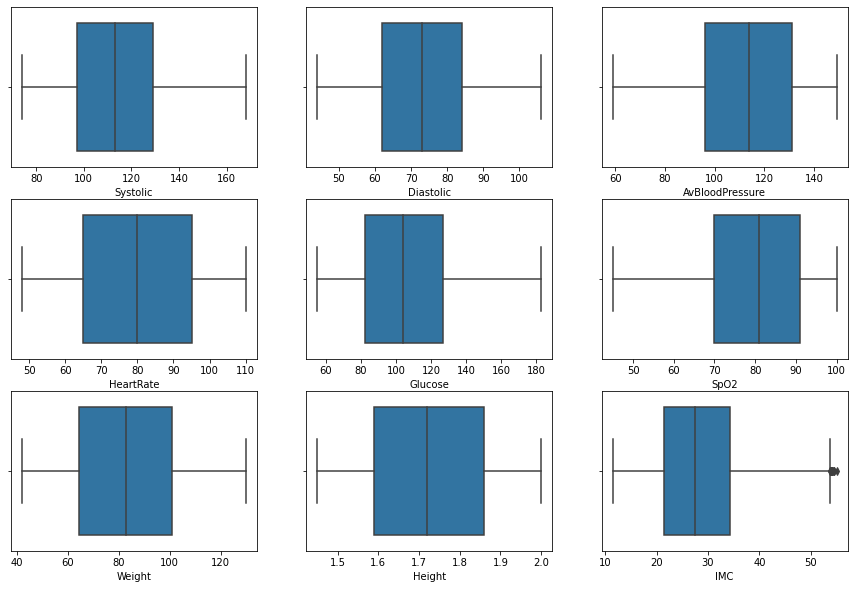

In [12]:
fig, axes = plt.subplots(3,3,figsize=(15,10))

sb.boxplot(x="Systolic", data=data, ax=axes[0, 0])
sb.boxplot(x="Diastolic", data=data, ax=axes[0, 1])
sb.boxplot(x="AvBloodPressure", data=data, ax=axes[0, 2])
sb.boxplot(x="HeartRate", data=data, ax=axes[1, 0])
sb.boxplot(x="Glucose", data=data, ax=axes[1, 1])
sb.boxplot(x="SpO2", data=data, ax=axes[1, 2])
sb.boxplot(x="Weight", data=data, ax=axes[2, 0])
sb.boxplot(x="Height", data=data, ax=axes[2, 1])
sb.boxplot(x="IMC", data=data, ax=axes[2, 2])

plt.show()

As we can see only `IMC` feature has still some outliers, but all other features have been cleaned from outliers. So for cleaning `IMC` feature we will delete all the entries which has **IMC greater than 50**, because the boundry line of the box is on 50 and after that all the data points are outliers. so we will do it manually in the cell below.

In [13]:
data = data[data.IMC <= 50]

Now once again we will visualize the features to check outliers

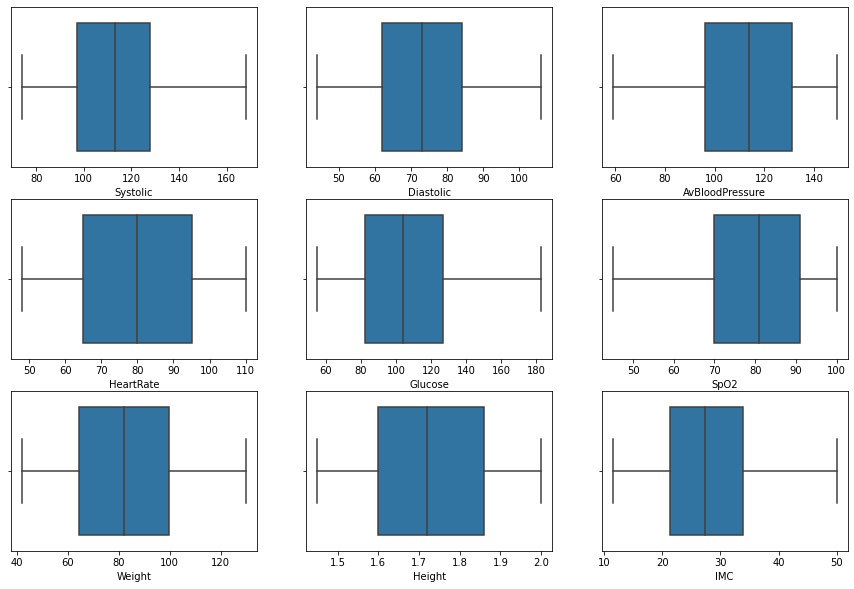

In [14]:
fig, axes = plt.subplots(3,3,figsize=(15,10))

sb.boxplot(x="Systolic", data=data, ax=axes[0, 0])
sb.boxplot(x="Diastolic", data=data, ax=axes[0, 1])
sb.boxplot(x="AvBloodPressure", data=data, ax=axes[0, 2])
sb.boxplot(x="HeartRate", data=data, ax=axes[1, 0])
sb.boxplot(x="Glucose", data=data, ax=axes[1, 1])
sb.boxplot(x="SpO2", data=data, ax=axes[1, 2])
sb.boxplot(x="Weight", data=data, ax=axes[2, 0])
sb.boxplot(x="Height", data=data, ax=axes[2, 1])
sb.boxplot(x="IMC", data=data, ax=axes[2, 2])

plt.show()

Now we have a clean dataset without a single outlier.

---
## Feature Analysis
Now after cleaning all the dataset we will do feature analysis and for that purpose we will use correlation analysis. 

### Correlation Analysis
Correlation analysis is use to find the associations between variables.The correlation coefficient is measured on a scale that varies from + 1 through 0 to - 1. Complete correlation between two variables is expressed by either + 1 or -1. When one variable increases as the other increases the correlation is positive; when one decreases as the other increases it is negative. Complete absence of correlation is represented by 0.

We are using pandas to calulate the correlation of a dataset, pandas function `.corr()` is used to calculate the correlation between features. There are 3 methods which can be used to calculate the correlation between features. we are using the `Spearman method`, other two methods are `kendall` and `pearson`.

In [15]:
corr_analysis =data.corr(method="spearman")
corr_analysis

,Systolic,Diastolic,AvBloodPressure,HeartRate,Glucose,SpO2,Weight,Height,IMC
Systolic,1.000000,0.008478,0.001467,-0.001434,-0.006019,0.008507,0.012305,0.001249,0.008489
Diastolic,0.008478,1.000000,-0.004095,0.005942,-0.016234,0.016972,0.018222,0.006256,0.012357
AvBloodPressure,0.001467,-0.004095,1.000000,0.025056,0.022427,-0.052966,0.012561,0.002359,0.012943
HeartRate,-0.001434,0.005942,0.025056,1.000000,0.026077,-0.003141,0.003633,0.004243,0.001865
Glucose,-0.006019,-0.016234,0.022427,0.026077,1.000000,0.019028,-0.003814,-0.011880,0.004145
SpO2,0.008507,0.016972,-0.052966,-0.003141,0.019028,1.000000,-0.010712,0.017602,-0.022748
Weight,0.012305,0.018222,0.012561,0.003633,-0.003814,-0.010712,1.000000,0.064655,0.818678
Height,0.001249,0.006256,0.002359,0.004243,-0.011880,0.017602,0.064655,1.000000,-0.502453
IMC,0.008489,0.012357,0.012943,0.001865,0.004145,-0.022748,0.818678,-0.502453,1.000000


## Plotting heatmap
The cell below will generate the heatmap for the corrleation analysis, this will helps us in visualizing the results. For plotting the heatmap we will be using `Seaborn` library function `.heatmap()`, this function takes the information about the correlation analysis and heat map colour is given in `cmap` parameter.

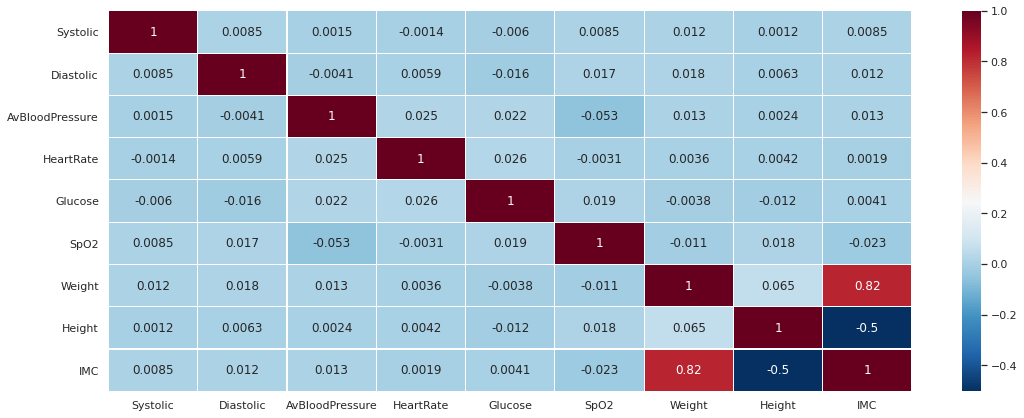

In [16]:
sb.set(rc={"figure.figsize":(18, 7)})
sb.heatmap(corr_analysis, 
            xticklabels=corr_analysis.columns,
            yticklabels=corr_analysis.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.1)

----
## K-Means Clustering
After the preprocessing (Cleaning) of our dataset, now we will apply unsupervised model to our dataset. We will be using `K-means Clustring` for that purpose. 

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. A cluster refers to a collection of data points aggregated together because of certain similarities. You’ll define a target number k, which refers to the number of centroids you need in the dataset (We had used k=2, because we need 2 clusters of data "sick" and "healthy" patients). A centroid is the imaginary or real location representing the center of the cluster. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

In the given cell below we will be using `KMeans()` module provided by `sklearn` library. For initializing KMeans() we just have to pass one argument and that is **number of clusters**. We had passed 2 because we need 2 clusters of data.

`.fit()` function will run the `K-Means` algorithm on the dataset and returns the predicted data classes

In [17]:
kmeans_1 = KMeans(n_clusters=2)
predictions = kmeans_1.fit_predict(data)

### Plotting K-means predicted classes
In the cell below we will plot the K-means predicted classes, we will be using only few entries for scatter plot, it will be easy to visualize few entries of data.

In the 6th line we have an expression `pd.concat([data.reset_index(), pd.DataFrame({'group':predictions})], axis=1)`, by the help of this expression we concatnate the dataset with the predicted classes and stored it in `clustered` variable. `pd.DataFrame({'group':predictions})`: we had stored the K-means output in prediction variable, so this expression is taking the `group` column from the prediction variable, `group` column has the predicted classes  

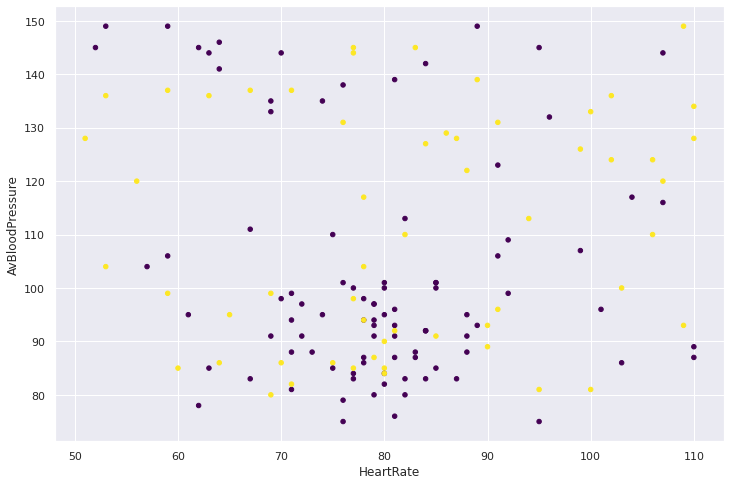

In [18]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_xlabel('HeartRate')
ax.set_ylabel('AvBloodPressure')
cmap='viridis'

clustered = pd.concat([data.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
plt.scatter(clustered['HeartRate'][:150], clustered['AvBloodPressure'][:150], c=clustered['group'][:150], s=20, cmap=cmap)

## DataFrame after adding Classes
As we have mentioned above, we have merged the dataset with predicted classes. In the below cell output you can see the dataset has a new column `group`. This `group` column refers to the predicted classes.

These classes are labeld as `0` and `1`, but for our model we need the classes of `sick` and `healthy` patients, so how can we tell that which group belongs to which class. For this reason I had searched alot on internet and I came up with the solution. Before going to the solution we need to understand some features that can tell us about the health of a patient:

- **Systolic:** This column refers to upper number in blood pressure
    - Normal is **less than 120**
    - Elevated is **120-129**
    - High Blood Pressure will be **above 130**.


- **Diastolic:** This column refers to lowe number in blood pressure
    - Normal is **less than 80**
    - High blood pressure is **90 or higher**


- **Glucose:** This column refers to the blood sugar level
    - Normal is **80-100**
    - Pre-Diabetic **101-125**
    - Diabetic **126+**
    
    
- **SpO2:** For Normal people it will be **95% or above** and for Hypoxic patients it will be **85%-94%**


So after knowing all those terms let's see our classified group features. As we can see in the below table group `0` has normal values for the above mentioned features, and group `1` has high level or low level values which refer as `Sick patients` they have to consult their doctors. 

So from the abve intuition we can say that class `0` is for `Healthy people` and class `1` is for `Sick people`
    


In [19]:
# 1 sick
# 0 Healthy
clustered

,index,Systolic,Diastolic,AvBloodPressure,HeartRate,Glucose,SpO2,Weight,Height,IMC,group
0,0,93.0,69.0,75.0,95.0,78.0,97.0,47.60,1.57,19.31,0
1,1,108.0,76.0,87.0,81.0,92.0,96.0,49.70,1.55,20.69,0
2,2,96.0,73.0,81.0,100.0,150.0,95.0,48.10,1.57,19.51,1
3,3,98.0,74.0,83.0,87.0,86.0,96.0,76.00,1.54,32.05,0
4,5,118.0,61.0,137.0,59.0,115.0,92.0,111.34,1.82,33.61,1
...,...,...,...,...,...,...,...,...,...,...,...
8379,12139,120.0,60.0,142.0,60.0,150.0,66.0,56.12,1.82,16.94,1
8380,12140,117.0,50.0,102.0,100.0,137.0,78.0,98.97,1.73,33.07,1
8381,12141,139.0,74.0,136.0,75.0,83.0,70.0,98.67,1.73,32.97,0
8382,12142,92.0,82.0,99.0,74.0,119.0,78.0,99.27,1.73,33.17,1


In the cell below we have seprated the class column into a seprate variable `label`

In [20]:
label = clustered["group"]

label

0       0
1       0
2       1
3       0
4       1
       ..
8379    1
8380    1
8381    0
8382    1
8383    1
Name: group, Length: 8384, dtype: int32

In the cell below we have droped `index` column which was generated by `K-Means` we don't need that, and we don't need our class column to be treated as feature, so we have deleted both of them and the rest columns will be our features on which our model will going to be trained and tesetd.

In [21]:
features = clustered.drop(["index", "group"], axis=1)
features

,Systolic,Diastolic,AvBloodPressure,HeartRate,Glucose,SpO2,Weight,Height,IMC
0,93.0,69.0,75.0,95.0,78.0,97.0,47.60,1.57,19.31
1,108.0,76.0,87.0,81.0,92.0,96.0,49.70,1.55,20.69
2,96.0,73.0,81.0,100.0,150.0,95.0,48.10,1.57,19.51
3,98.0,74.0,83.0,87.0,86.0,96.0,76.00,1.54,32.05
4,118.0,61.0,137.0,59.0,115.0,92.0,111.34,1.82,33.61
...,...,...,...,...,...,...,...,...,...
8379,120.0,60.0,142.0,60.0,150.0,66.0,56.12,1.82,16.94
8380,117.0,50.0,102.0,100.0,137.0,78.0,98.97,1.73,33.07
8381,139.0,74.0,136.0,75.0,83.0,70.0,98.67,1.73,32.97
8382,92.0,82.0,99.0,74.0,119.0,78.0,99.27,1.73,33.17


## Scaling the data
As we can see that in our dataset all the features have very high or very low values, this type of difference in values can create bias in the dataset which results in bad accuracy of the model in both training and testing. So fo this purpose we will scale the dataset. We will scale the data in two steps

- **Step1:** We will first calculate the maximum values for each feature.
- **Step2:** We will divide each feature entry by it's maximum value

In [22]:
# Calculating the maximum values for each feature

max_systolic = np.amax(features["Systolic"])
max_diastolic = np.amax(features["Diastolic"])
max_avBloodPressure = np.amax(features["AvBloodPressure"])
max_heartRate = np.amax(features["HeartRate"])
max_glucose = np.amax(features["Glucose"])
max_spO2 = np.amax(features["SpO2"])
max_weight = np.amax(features["Weight"])
max_height = np.amax(features["Height"])
max_IMC = np.amax(features["IMC"])

In [23]:
# Dividing each feature with it's maximum value
features["Systolic"] = features["Systolic"]/max_systolic
features["Diastolic"] = features["Diastolic"]/max_diastolic
features["AvBloodPressure"] = features["AvBloodPressure"]/max_avBloodPressure
features["HeartRate"] = features["HeartRate"]/max_heartRate
features["Glucose"] = features["Glucose"]/max_glucose
features["SpO2"] = features["SpO2"]/max_spO2
features["Weight"] = features["Weight"]/max_weight
features["Height"] = features["Height"]/max_height
features["IMC"] = features["IMC"]/max_IMC

Now after scaling the dataset we will display the dataframe to check the values in the dataset.

In [24]:
features

,Systolic,Diastolic,AvBloodPressure,HeartRate,Glucose,SpO2,Weight,Height,IMC
0,0.553571,0.650943,0.503356,0.863636,0.426230,0.97,0.366718,0.785,0.386509
1,0.642857,0.716981,0.583893,0.736364,0.502732,0.96,0.382897,0.775,0.414131
2,0.571429,0.688679,0.543624,0.909091,0.819672,0.95,0.370570,0.785,0.390512
3,0.583333,0.698113,0.557047,0.790909,0.469945,0.96,0.585516,0.770,0.641513
4,0.702381,0.575472,0.919463,0.536364,0.628415,0.92,0.857781,0.910,0.672738
...,...,...,...,...,...,...,...,...,...
8379,0.714286,0.566038,0.953020,0.545455,0.819672,0.66,0.432357,0.910,0.339071
8380,0.696429,0.471698,0.684564,0.909091,0.748634,0.78,0.762481,0.865,0.661930
8381,0.827381,0.698113,0.912752,0.681818,0.453552,0.70,0.760169,0.865,0.659928
8382,0.547619,0.773585,0.664430,0.672727,0.650273,0.78,0.764792,0.865,0.663931


## Spliting the dataset into Training and Testing
For spiliting our data into training and testing subsets we will use the function `train_test_split()` provided by `sklearn`. In this function we have to set the `test_size` and `random_state`. We will be setting `test_size to 20%` and `random_state = 2`. By the help of random state parameter the function will first shuffle the dataset and then split it into training and testing. Shuffling of dataset is good paractice by the help of this we can generalize the model, adn the model performs well in testing.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=2)

print("Number of training samples is", len(X_train))
display(X_train[:10])
print("Number of testing samples is", len(X_test))
display(X_test[:10])

Number of training samples is 6707


,Systolic,Diastolic,AvBloodPressure,HeartRate,Glucose,SpO2,Weight,Height,IMC
4753,0.547619,0.783019,0.644295,0.636364,0.437158,0.70,0.511248,0.775,0.552842
6508,0.547619,0.566038,1.000000,0.863636,0.409836,0.78,0.476425,0.765,0.528823
4958,0.642857,0.801887,0.597315,0.809091,0.398907,0.78,0.647227,0.935,0.480785
6570,0.720238,0.556604,0.536913,0.590909,0.426230,0.67,0.720262,0.750,0.831665
2635,0.571429,0.650943,0.912752,0.972727,0.404372,0.81,0.430586,0.810,0.426341
3366,0.821429,0.584906,0.765101,0.563636,0.819672,0.70,0.480200,0.770,0.526021
6898,0.857143,0.481132,0.953020,0.836364,0.404372,0.64,0.491911,0.990,0.326061
4038,0.488095,0.735849,0.718121,0.818182,0.349727,0.95,0.671418,0.950,0.483187
4864,0.678571,0.886792,0.617450,0.618182,0.333333,0.68,0.544068,0.755,0.619896
2866,0.654762,0.801887,0.697987,0.581818,0.568306,0.89,0.688367,0.935,0.511409


Number of testing samples is 1677


,Systolic,Diastolic,AvBloodPressure,HeartRate,Glucose,SpO2,Weight,Height,IMC
2655,0.505952,0.669811,0.966443,0.818182,0.786885,0.85,0.516487,0.745,0.604484
7725,0.750000,0.688679,0.966443,0.845455,0.595628,0.81,0.903775,0.835,0.841873
2325,0.672619,0.650943,0.865772,0.836364,0.524590,0.97,0.396302,0.815,0.387510
6750,0.535714,0.688679,0.798658,0.554545,0.540984,0.86,0.790986,0.945,0.575260
5932,0.696429,0.707547,1.000000,0.554545,0.366120,0.84,0.653929,0.995,0.428943
426,0.750000,0.754717,0.604027,0.636364,0.557377,0.92,0.531587,0.875,0.450961
2986,0.720238,0.867925,0.543624,0.581818,0.617486,0.79,0.749923,0.730,0.914131
727,0.571429,0.896226,0.765101,0.936364,0.677596,0.69,0.770955,0.960,0.543435
6731,0.523810,0.792453,0.865772,0.854545,0.453552,0.81,0.592065,0.945,0.430544
2080,0.505952,0.764151,0.684564,0.918182,0.770492,0.67,0.528351,0.775,0.571457


## Converting the dataframe into vectors array
For feeding our data into Neural Network, we first have to convert the dataset into array of vectors. Note that Neural Networks only accepts vectors as input.

For the conversion we will be using `np.array()` function. Features will be directly converted to vectors and for labels/classes we just have to do one more step. Note that we have 2 classes in our dataset `Sick`=>`1` and `Healthy`=>`0`, so the output layer of the Neural Network will also have two nodes, one for 0 and the other for 1. So for this purpose we first have to convert each label/class into categorical data and then we will convert them into the vectors. For converting into categorical data we will use `Keras` function `keras.utils.to_categorical()`, this function takes two parameters first one is the dataframe of the labels and the second one is the number of classes we have in our dataset in our case we have passed `2`. The categorical function will return an array like these for each class:
   
- [1. 0.] refers to class/label `0`
- [0. 1.] refers to class/label `1`
 

In [26]:
features = np.array(X_train)
targets = np.array(keras.utils.to_categorical(y_train, 2))
features_test = np.array(X_test)
targets_test = np.array(keras.utils.to_categorical(y_test, 2))

print(features[:10])
print(targets[:10])

[[0.54761905 0.78301887 0.6442953  0.63636364 0.43715847 0.7
  0.51124807 0.775      0.55284227]
 [0.54761905 0.56603774 1.         0.86363636 0.40983607 0.78
  0.47642527 0.765      0.52882306]
 [0.64285714 0.80188679 0.59731544 0.80909091 0.3989071  0.78
  0.6472265  0.935      0.48078463]
 [0.7202381  0.55660377 0.53691275 0.59090909 0.42622951 0.67
  0.72026194 0.75       0.83166533]
 [0.57142857 0.6509434  0.91275168 0.97272727 0.40437158 0.81
  0.43058552 0.81       0.42634107]
 [0.82142857 0.58490566 0.76510067 0.56363636 0.81967213 0.7
  0.48020031 0.77       0.52602082]
 [0.85714286 0.48113208 0.95302013 0.83636364 0.40437158 0.64
  0.49191063 0.99       0.32606085]
 [0.48809524 0.73584906 0.71812081 0.81818182 0.34972678 0.95
  0.67141757 0.95       0.48318655]
 [0.67857143 0.88679245 0.61744966 0.61818182 0.33333333 0.68
  0.5440678  0.755      0.61989592]
 [0.6547619  0.80188679 0.69798658 0.58181818 0.56830601 0.89
  0.68836672 0.935      0.51140913]]
[[1. 0.]
 [1. 0.]
 [1

## Building Neural Network Architecture
In the cell below we have defined the architecture for Neural Network.

- **Sequential()**: This class is provided by Keras, by the help of this class we will initialize our Neural network Model.

- **add()**: This `add` function will add a layer in the Neural Network.

- **Dense()**: This is the layer class, by the help of `Dense` class we initialize a layer, it takes following parameters:
    - **Number of Nodes**: First parameter refer to the number of nodes that the layer will have
    - **activation**: This refers to the activation function for the nodes in the layer, for input and hidden layers we will be using `relu` activation function aka **Rectified Linear Unit** function, and for the output layer we will be using `softmax` becuase we have two classes in our dataset.
    - **input_shape**: This parameter will be given only in the first layer of the Netowrk. This refers to the number of columns the dataset have, so then the model will know how many input parameters it will have to take from the dataset.

- **Dropout**: This function prevents overfitting in the model. This is basically the percentage of nodes that will be randomly swtiched off while computation.

- **Compile**: This will compile our defined architecutre and check for any potential errors. It takes following parameters.
    - **loss**: We have to define a loss function, there are many loss functions provided by keras but we will be using `categorical_crossentropy`.
    - **optimizer**: For optimizer function we will be using `adamax`
    - **metrics**: We want our metrics into accuracy, so that's why we have selected accuracy.
    
- **Summary()**: This will output the compiled model summary for us. 

In [27]:
# Building the model
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(features.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              10240     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               6

## Training the Model with Cross Validation
We will be training our model with cross validation so then we can have the best results and also it will prevent our model from overfitting. We will also save the best weights of the model so then when we train the model next time it will use the random weights it will used the previous save one.

For saving the weights we will be using `callback` function `ModelCheckpoint` provided by `Keras`. We have taken 20% of the data as our validation set. 

`Batch size` in the fit function refers to the number of points that will be going to trained togehter, if we don't set the batch size then all the entries in the dataset will be trained at once which is not good paractice.

`Epochs` are the number of iterations the model did, for Neural Network it will be Number of propagations (Forward and Bakward) in our case it will propagate 15 times forward and backward

Feel free to change the batch_size and epochs, it will affect the accuracy of the model but you will learn alot from it.

In [30]:
# Training the model with validation set
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.mode.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(features, targets, batch_size=100, epochs=15, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/15
52/54 [===========================>..] - ETA: 0s - loss: 0.0563 - accuracy: 0.9775
Epoch 00001: val_loss improved from inf to 0.02681, saving model to model.mode.best.hdf5
54/54 [==============================] - 1s 21ms/step - loss: 0.0560 - accuracy: 0.9776 - val_loss: 0.0268 - val_accuracy: 0.9933
Epoch 2/15
52/54 [===========================>..] - ETA: 0s - loss: 0.0404 - accuracy: 0.9846
Epoch 00002: val_loss improved from 0.02681 to 0.02292, saving model to model.mode.best.hdf5
54/54 [==============================] - 1s 25ms/step - loss: 0.0408 - accuracy: 0.9842 - val_loss: 0.0229 - val_accuracy: 0.9918
Epoch 3/15
53/54 [============================>.] - ETA: 0s - loss: 0.0582 - accuracy: 0.9736
Epoch 00003: val_loss did not improve from 0.02292
54/54 [==============================] - 1s 21ms/step - loss: 0.0592 - accuracy: 0.9732 - val_loss: 0.0638 - val_accuracy: 0.9702
Epoch 4/15
52/54 [===========================>..] - ETA: 0s - loss: 0.0626 - accuracy: 0.9737
E

As you can see in the above output in the last iteration/epoch we had the **0.047** loss, **97.82%** accuracy on training set and **98.44%** of accuracy on validation set. Which is very much goo

In [31]:
training_score = model.evaluate(features, targets)
print("\n Training Accuracy:", training_score[1])
testing_score = model.evaluate(features_test, targets_test)
print("\n Testing Accuracy:", testing_score[1])

210/210 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9866

 Training Accuracy: 0.9865812063217163
53/53 [==============================] - 0s 4ms/step - loss: 0.0357 - accuracy: 0.9839

 Testing Accuracy: 0.9838998317718506


## Visualizing Model Loss and Accuracy
In the cells below we will plot the graph for model's loss and accuracy. For ploting graphs we are using matplotlib and in simple lines of code we will get the graph for each

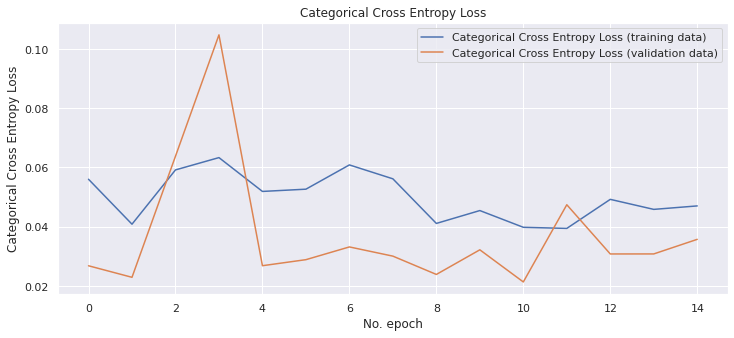

In [32]:
# Plot history: MAE
plt.figure(figsize=(12, 5))

plt.plot(hist.history['loss'], label='Categorical Cross Entropy Loss (training data)')
plt.plot(hist.history['val_loss'], label='Categorical Cross Entropy Loss (validation data)')
plt.title('Categorical Cross Entropy Loss')
plt.ylabel('Categorical Cross Entropy Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

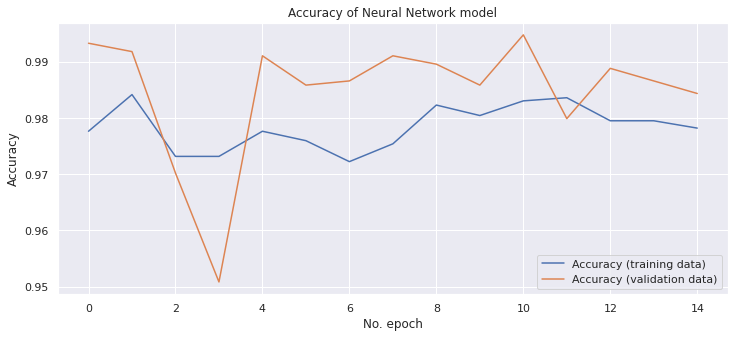

In [33]:
# Plot history: MAE
plt.figure(figsize=(12, 5))

plt.plot(hist.history['accuracy'], label='Accuracy (training data)')
plt.plot(hist.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Accuracy of Neural Network model')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

## Saving Data in Files
Now in the last part of this file we will be saving important information so that it can be used in data presentation section of the project, we will be saving following things

- **Trained Model**: We will convert the model into json and then save that in the file with the trained weights. For converting and saving the model we will be using `keras` function `.to_json()` which will convert the model into json and by simple file saving techniques we will save both weights and trained model in different files

- **Model Accuracies**: We will save them in a file so then in model presentation page we can show both training and testing accuracy of the model.

- **Features Max Values**: We will store them to scale new incoming data values, this will help in the prediction of best results.

In [34]:
# Saving the model

# serialize model to JSON
model_json = model.to_json()
with open("data_presentation/model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("data_presentation/model-weights.h5")
print("Saved model to disk")

Saved model to disk


In [35]:
# Saving accuracy

file = open('data_presentation/accuracy.txt', 'w')
file.write(str(training_score[1])+'\n')
file.write(str(testing_score[1])+'\n')
file.close()

In [36]:
# Saving Max values for scalling new incoming data

f = open('data_presentation/max_values.txt', 'w')
f.write(str(max_systolic)+'\n')
f.write(str(max_diastolic)+'\n')
f.write(str(max_avBloodPressure)+'\n')
f.write(str(max_heartRate)+'\n')
f.write(str(max_glucose)+'\n')
f.write(str(max_spO2)+'\n')
f.write(str(max_weight)+'\n')
f.write(str(max_height)+'\n')
f.write(str(max_IMC)+'\n')
f.close()